<a href="https://colab.research.google.com/github/Krithika-Devi/training/blob/main/EDA_on_UK_Universities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uk_universities.csv to uk_universities.csv


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('uk_universities.csv')
df.head()

,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),International_students,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,21750,23187,20.20%,85.50%,"20,000-24,999","over-5,000",Public,Trimesters,Urban,12000,52.2054,0.1132,www.cam.ac.uk
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,21770,19888,16.80%,86.50%,"25,000-29,999","over-5,000",Public,Trimesters,Urban,11500,51.7548,-1.2544,www.ox.ac.uk
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,17040,15440,40.40%,87.90%,"10,000-14,999","1,000-1,499",Public,Semesters,Suburban,12000,56.3417,-2.7943,www.st-andrews.ac.uk
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,23500,29900,41.40%,77.90%,"15,000-19,999","4,000-4,499",Public,Continuous,Urban,10700,51.4988,-0.1749,www.ic.ac.uk
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,16400,16400,22.00%,85.80%,"15,000-19,999","1,500-1,999",Public,Semesters,Suburban,9398,52.7650,-1.2321,www.lboro.ac.uk/


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   University_name                                131 non-null    object 
 1   Region                                         131 non-null    object 
 2   Founded_year                                   131 non-null    int64  
 3   Motto                                          114 non-null    object 
 4   UK_rank                                        131 non-null    int64  
 5   World_rank                                     131 non-null    int64  
 6   CWUR_score                                     84 non-null     float64
 7   Minimum_IELTS_score                            131 non-null    float64
 8   UG_average_fees_(in_pounds)                    131 non-null    int64  
 9   PG_average_fees_(in_pounds)                    131 non

## **Considering Universities that has only World University Ranking score**

Thus, dropping null values in CWUR_score.

In [ ]:
df = df.dropna(subset=['CWUR_score'])

In [ ]:
df['Campus_setting'].value_counts()

Urban       49
Suburban    23
Rural        2
Name: Campus_setting, dtype: int64

In [ ]:
df['Campus_setting'].fillna('Urban',inplace=True)

In [ ]:
df['Campus_setting'].value_counts()

Urban       59
Suburban    23
Rural        2
Name: Campus_setting, dtype: int64

In [ ]:
df['Academic_Calender'].value_counts()

Semesters     54
Trimesters    13
Continuous     5
Other          3
Quarters       1
Name: Academic_Calender, dtype: int64

In [ ]:
df['Academic_Calender'].fillna('Semesters',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 123
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   University_name                                84 non-null     object 
 1   Region                                         84 non-null     object 
 2   Founded_year                                   84 non-null     int64  
 3   Motto                                          76 non-null     object 
 4   UK_rank                                        84 non-null     int64  
 5   World_rank                                     84 non-null     int64  
 6   CWUR_score                                     84 non-null     float64
 7   Minimum_IELTS_score                            84 non-null     float64
 8   UG_average_fees_(in_pounds)                    84 non-null     int64  
 9   PG_average_fees_(in_pounds)                    84 non-n

In [ ]:
df.describe()

,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude
count,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1898.25000,51.369048,505.452381,73.960714,5.107143,13454.535714,14135.940476,8768.821429,52.865337,-1.722452
std,162.86515,35.307182,587.436526,6.351473,0.649705,2557.323198,3245.330441,1529.532373,1.683137,1.569688
min,1096.00000,1.000000,2.000000,65.900000,4.000000,9500.000000,10000.000000,6000.000000,50.375900,-6.675200
25%,1888.50000,22.750000,132.250000,68.675000,4.500000,11687.500000,12275.000000,7771.000000,51.500150,-2.789350
50%,1963.00000,45.500000,419.000000,72.600000,5.500000,13000.000000,13500.000000,8295.000000,52.468750,-1.551500
75%,1992.00000,74.250000,693.000000,77.700000,5.500000,14462.500000,14856.250000,9810.000000,53.777700,-0.289700
max,2004.00000,124.000000,4608.000000,94.100000,6.500000,23500.000000,29900.000000,12500.000000,57.164800,1.241100


In [ ]:
df['Control_type'].value_counts()

Public     83
Private     1
Name: Control_type, dtype: int64

In [ ]:
df['Founded_year'].value_counts()

1992    19
1966     7
1964     3
1963     3
1967     3
1904     2
1965     2
1849     2
1895     2
1733     1
1872     1
1989     1
1968     1
1865     1
1916     1
1957     1
1962     1
1209     1
2004     1
1884     1
1892     1
1954     1
1890     1
1993     1
1973     1
1897     1
1841     1
1838     1
1856     1
1829     1
1961     1
1997     1
1413     1
1907     1
1832     1
1826     1
1955     1
1900     1
1909     1
1451     1
1824     1
1952     1
1948     1
1583     1
1905     1
1495     1
1881     1
1096     1
1920     1
1858     1
Name: Founded_year, dtype: int64

In [ ]:
df['Region'].value_counts()

London                      15
Scotland                    11
South East England          10
Yorkshire and the Humber     8
North West England           7
East of England              6
West Midlands                6
South West England           6
East Midlands                5
Wales                        5
North East England           3
Northern Ireland             2
Name: Region, dtype: int64

In [ ]:
df1 =df.loc[(df['Founded_year'] >1950) & (df['UK_rank'] <=20)]

In [ ]:
df2 =df.loc[(df['Founded_year'] >1950) & (df['UK_rank'] >20) & (df['UK_rank'] <=40)]

#### **To determine which founded year universities have the greatest number of UK_rank**

<Figure size 2160x720 with 0 Axes>

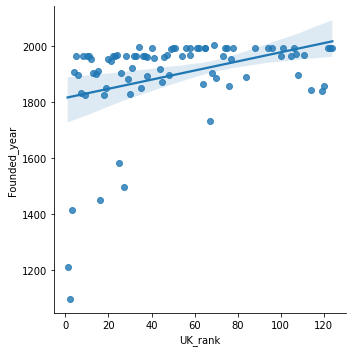

In [ ]:
plt.figure(figsize=(30,10))
sns.lmplot(x='UK_rank',y='Founded_year',data=df)

#### **To view which region have high UK_rank with relation to founded year**

*UK_rank inbetween 1 to 20*

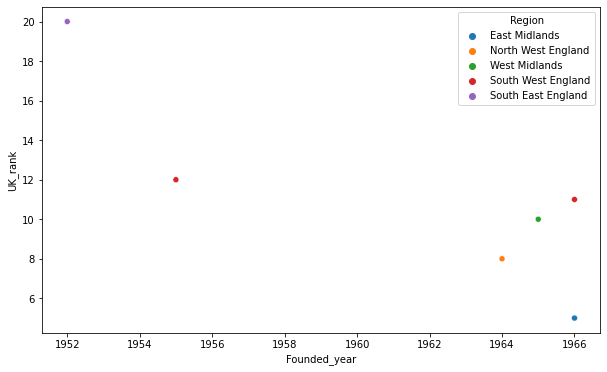

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,x='Founded_year',y='UK_rank',hue='Region')

*UK_rank inbetween 20 to 40*

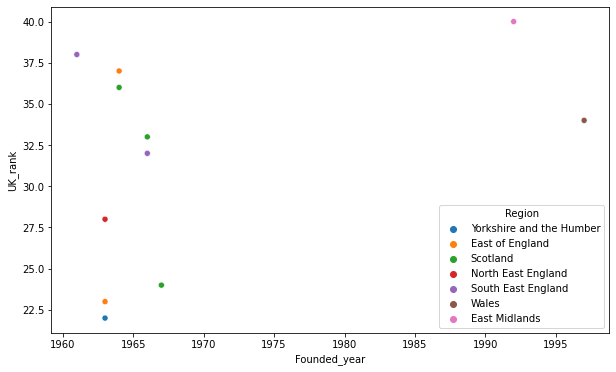

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Founded_year',y='UK_rank',hue='Region')

Text(0.5, 1.0, 'Distribution of Campus setting')

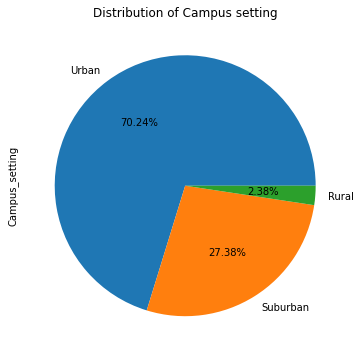

In [ ]:
df['Campus_setting'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of Campus setting")

#### **To know the correlation relationship between variables in a data**

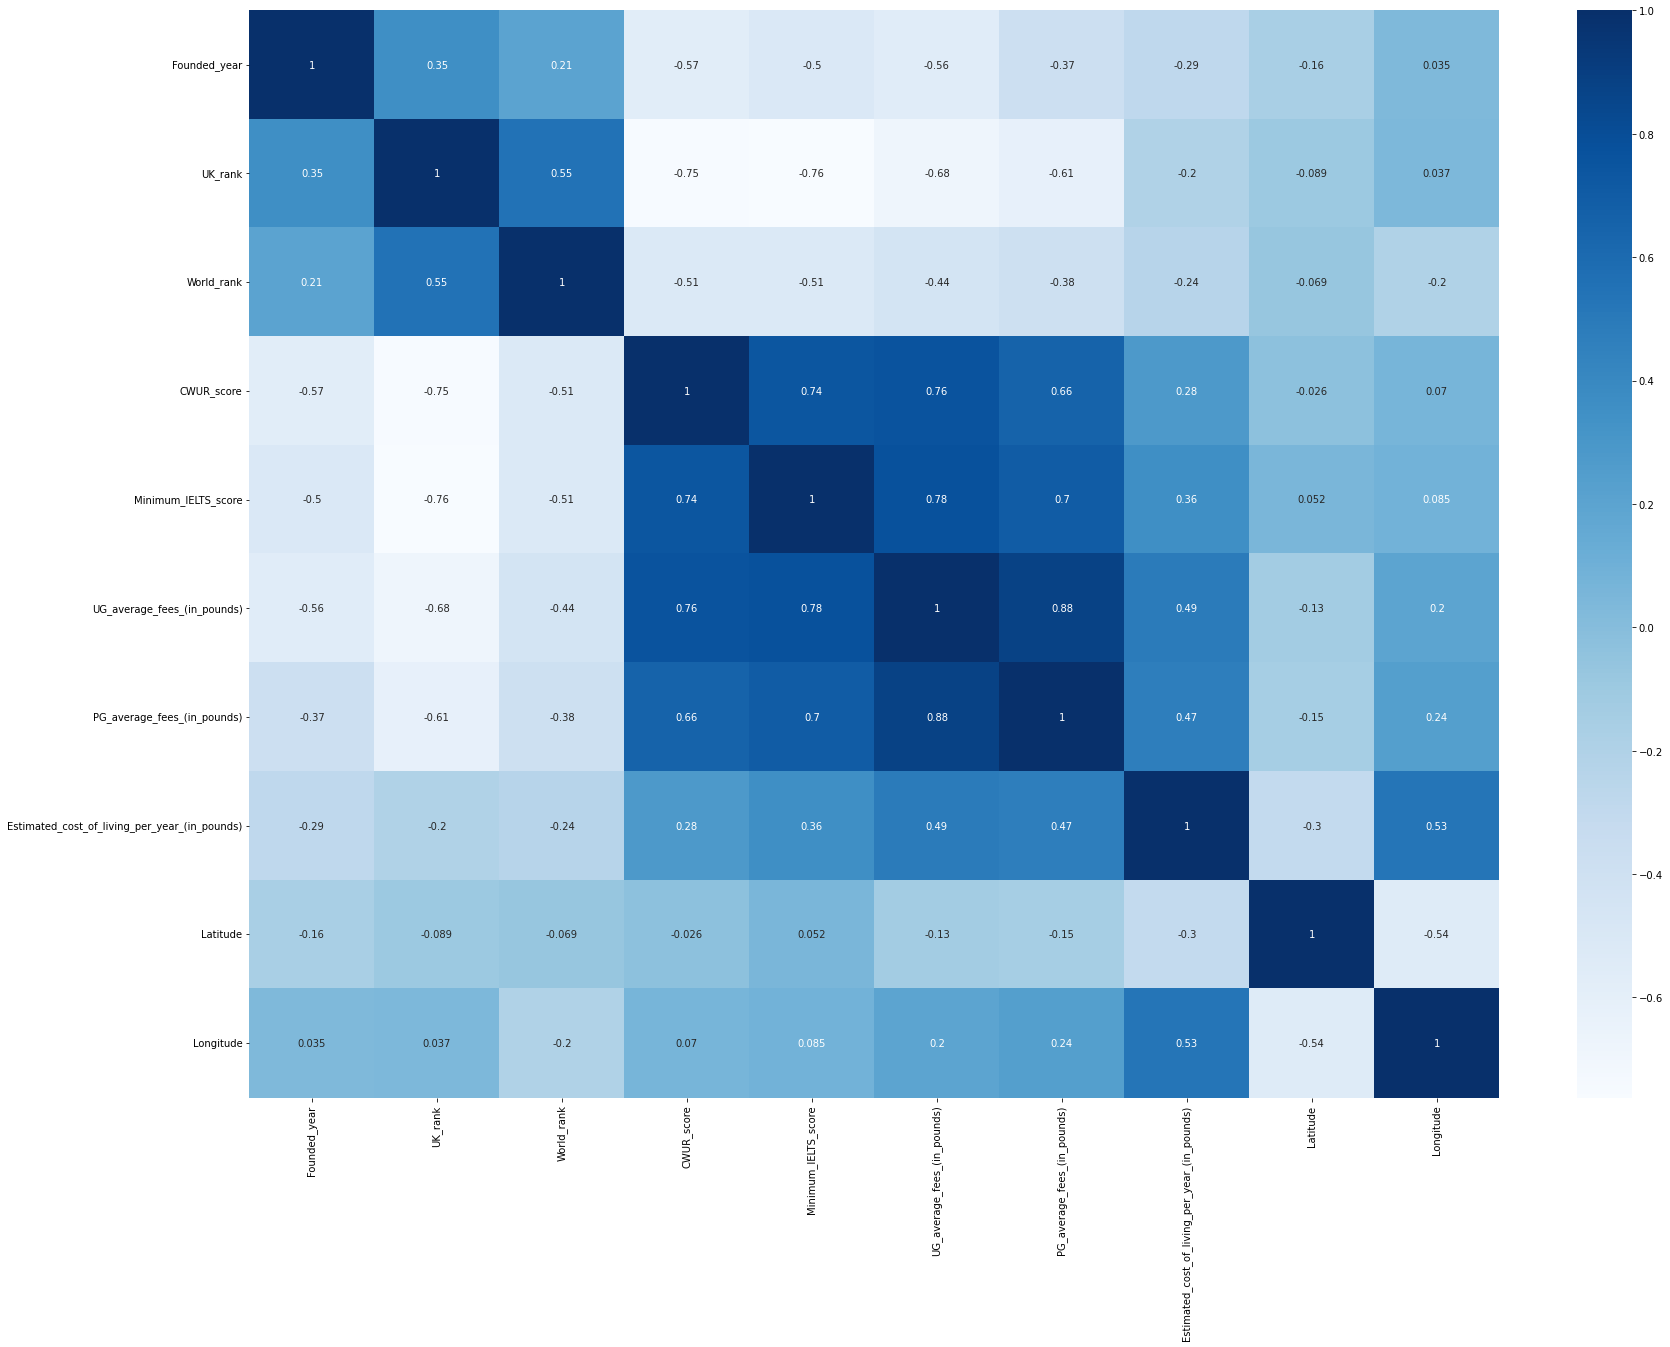

In [ ]:
fig=plt.figure(figsize=(28,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()
fig.savefig('ukunivheatmap.png')

In [ ]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

#### **To know which estimated cost of living per year has highest percentage**

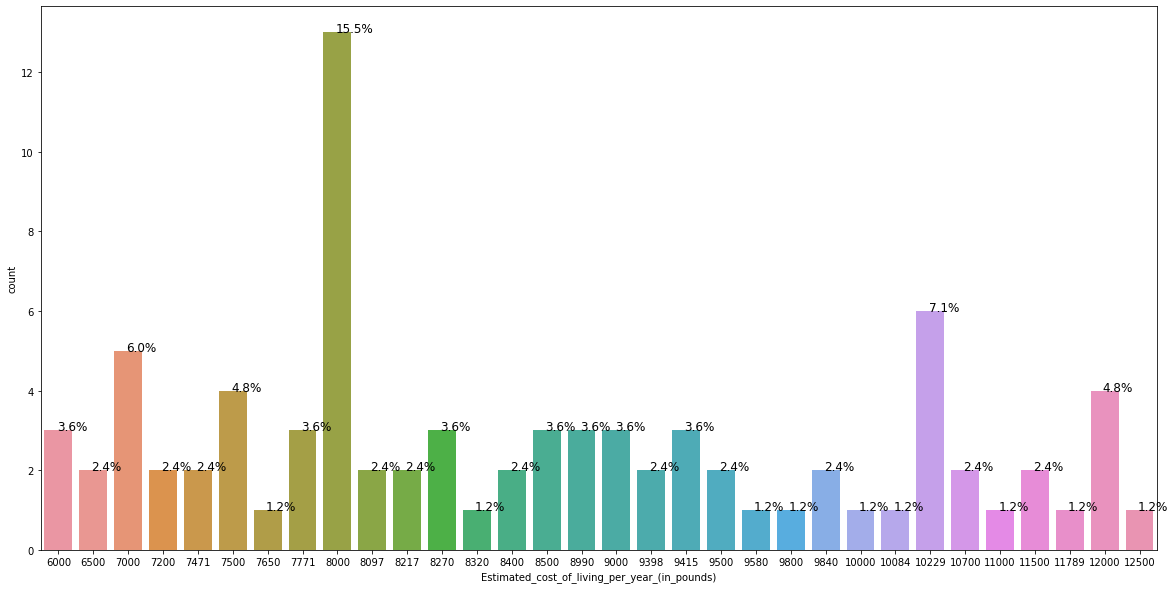

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Estimated_cost_of_living_per_year_(in_pounds)', data=df)
without_hue(ax, df['Estimated_cost_of_living_per_year_(in_pounds)'])

#### **To determine the distribution of region**

Text(0.5, 1.0, 'Distribution of Region')

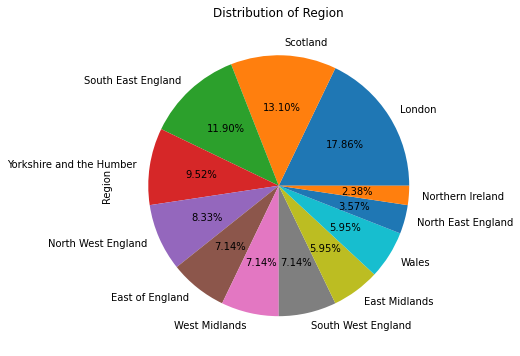

In [ ]:
df['Region'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of Region")

In [ ]:
df['Student_satisfaction'].sort_values(ascending=False)

2     87.90%
1     86.50%
44    86.10%
4     85.80%
0     85.50%
       ...  
29    72.50%
67    72.00%
66    71.90%
43    71.20%
5     68.50%
Name: Student_satisfaction, Length: 84, dtype: object

#### **To see student satisfaction according to Region under campus setting**

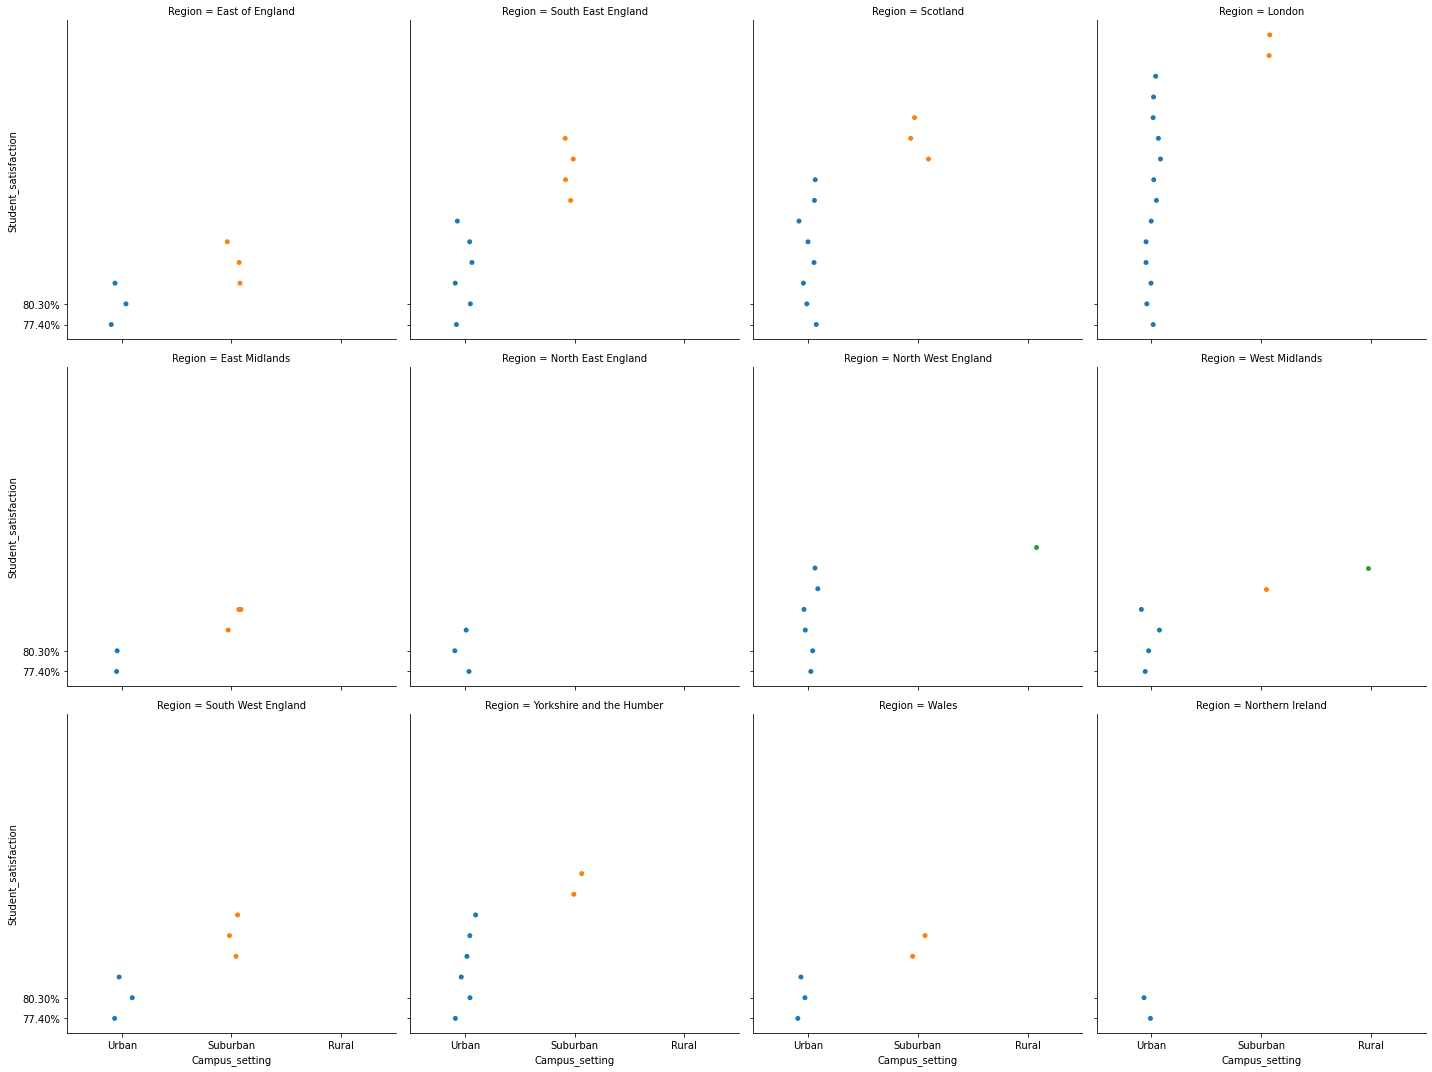

In [ ]:
sns.catplot(x='Campus_setting',col='Region',y='Student_satisfaction',data=df,col_wrap=4)
plt.show()

In [ ]:
df3 =df.loc[(df['Founded_year'] >1950) & (df['UK_rank'] <=50)]

#### **To see the percentage of international students studying according to world rank in different regions where UK rank <= 50**

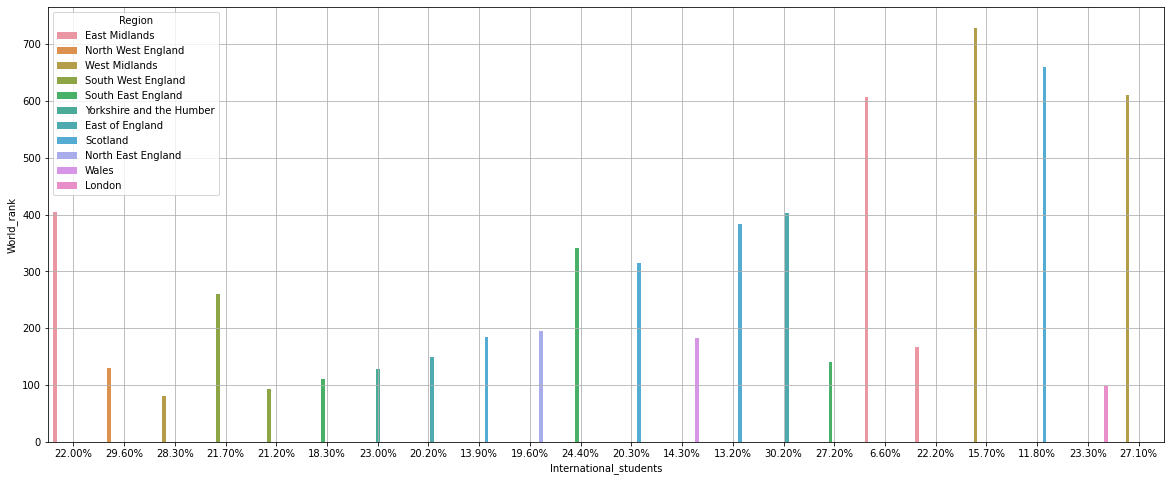

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='International_students',y='World_rank',hue='Region',data=df3,ax=ax)
plt.grid()

#### **To see the percentage of international students studying according to world rank under different regions and campus setting**

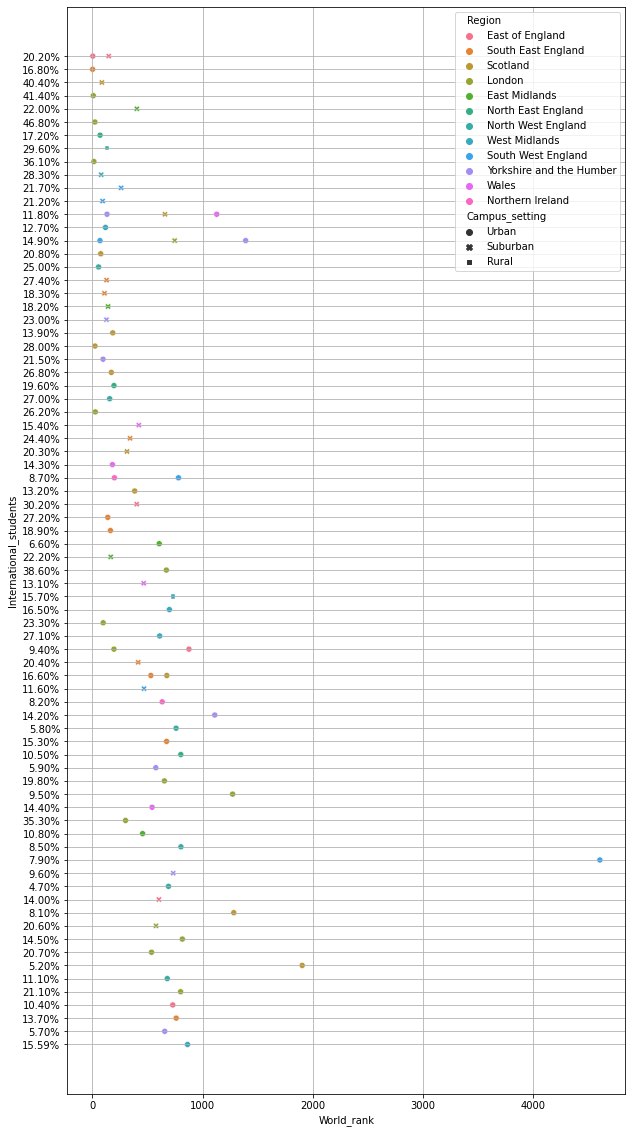

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.scatterplot(x="World_rank",y="International_students",hue='Region',style = 'Campus_setting',data=df,ax=ax)
plt.grid()
plt.show()

#### **To determine the student enrollment in relation to PG average fees**

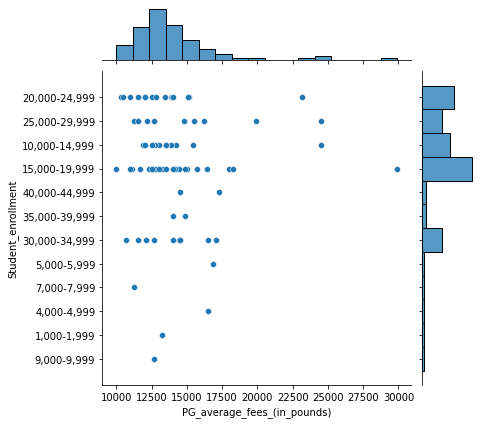

In [ ]:
sns.jointplot(x="PG_average_fees_(in_pounds)",y="Student_enrollment",data=df)
plt.show()

#### **To see the percentage of international students studying according to Estimated cost of living per year under different regions and Minimum IELTS score**

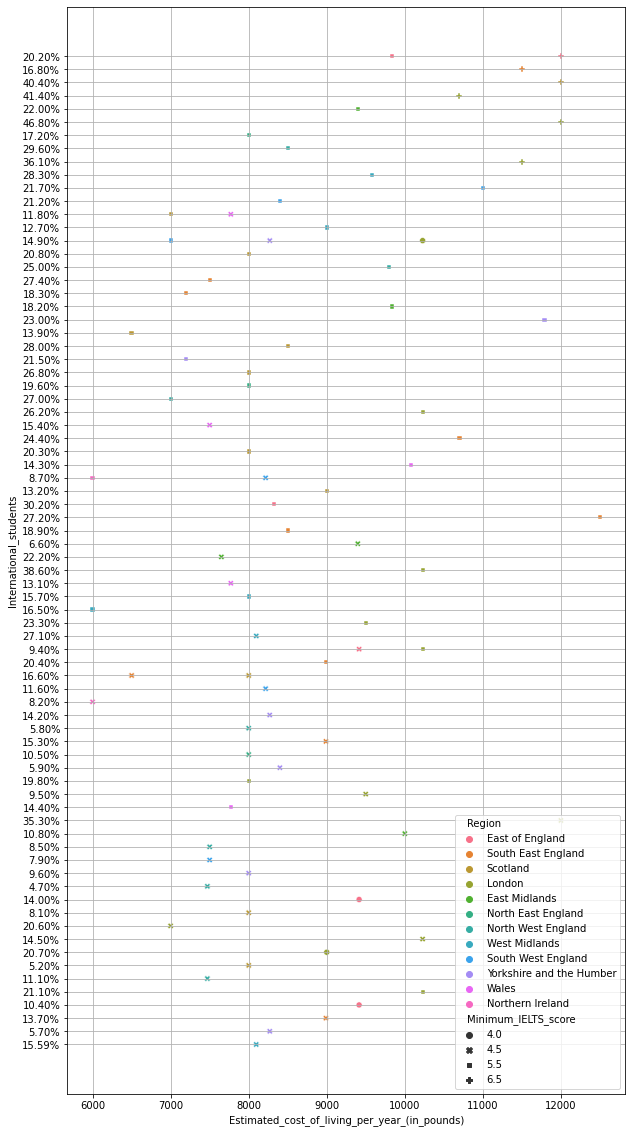

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.scatterplot(x="Estimated_cost_of_living_per_year_(in_pounds)",y="International_students",hue='Region',style = 'Minimum_IELTS_score',data=df,ax=ax)
plt.grid()
plt.show()

#### **Count of Minimum required IELTS Score in Univeristies**

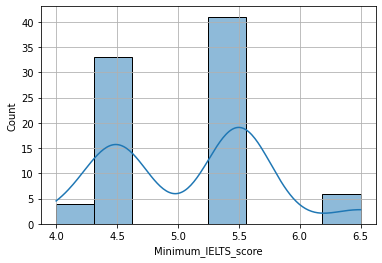

In [ ]:
sns.histplot(x="Minimum_IELTS_score",kde=True,data=df)
plt.grid()
plt.show()

#### **To know about number of student enrollments in relationship with estimated cost of living per year under different regions**

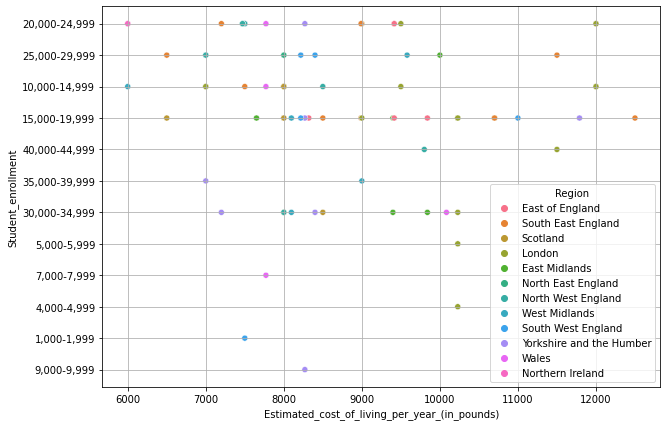

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x="Estimated_cost_of_living_per_year_(in_pounds)",y="Student_enrollment",hue='Region',data=df,ax=ax)
plt.grid()
plt.show()